  Created wheel for TwitterAPI: filename=TwitterAPI-2.6.9-cp37-none-any.whl size=13018 sha256=3baf013968eb1d33ef554d022690e3728ae7133edb4801ef489af1156c1f9a87
  Stored in directory: /root/.cache/pip/wheels/a5/0e/95/20cc6509adc448f64c2dd616bdc6fd25ce147b60ecfbc2c322
Successfully built TwitterAPI
     |████████████████████████████████| 74.6MB 54kB/s 
ERROR: Could not find a version that satisfies the requirement orca==1.2.1 (from versions: 1.0.0, 1.1.0, 1.2.0, 1.3.0, 1.4.0, 1.5.1, 1.5.3, 1.5.4)
ERROR: No matching distribution found for orca==1.2.1
     |████████████████████████████████| 11.5MB 4.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
--2021-02-26 18:18:34--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 F

'hello world'

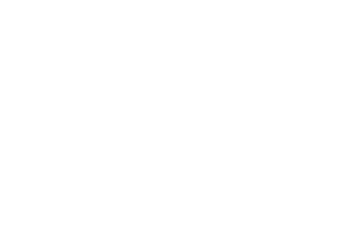

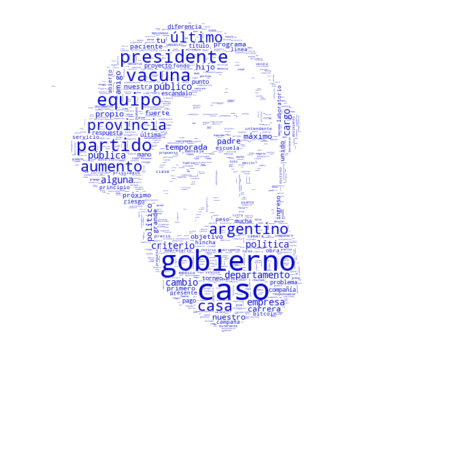

In [ ]:
!pip install TwitterAPI
!pip install -U kaleido
!pip install orca==1.2.1
!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
import requests
import json
from operator import itemgetter
from bs4 import BeautifulSoup
import networkx as nx
from TwitterAPI import TwitterAPI
import urllib
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
from io import BytesIO
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random
from plotly.offline import init_notebook_mode, iplot
import plotly.express as ex
import plotly.graph_objs as go
import requests
import json
from operator import itemgetter
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import networkx as nx
from TwitterAPI import TwitterAPI
import urllib
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
from io import BytesIO
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random

outliers = ["sa","protegido","comentario","reglamento","copyright","cuenta","miembro","nacion","club","diarios","home","gda","recaptcha","Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'muchos', 'decisión', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo', 'bien', 'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de', 'términos','privacidad','reservado','derechos','condiciones','ar','enerodni','www','reservados']


def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
    
def seccionLinks(url,seccion):
  linkanterior = ""
  linksadevolver = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  lista = soup.find_all('a')
  indice =0
  while indice<len(lista):
    link = lista[indice].get('href')
    i =0
    categoria = ""
    contadorbarras =0
    if link != None:
      while i<len(link):
        if contadorbarras==0 and link[i] == "/":
          contadorbarras=1
        elif contadorbarras == 1:
          if link[i]!= "/":
            categoria+=link[i]
          else :
            contadorbarras = 2
        i+=1
      if categoria==seccion:
        if(link!=linkanterior):
          linkanterior=link
          linksadevolver.append(link)
    indice+=1
  return linksadevolver

def palabrasArticulo(url):
  palabras = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  #juan = json.loads(soup.find('script',type="application/ld+json").text)
  juan = soup.find_all('p')
  for items in juan:
    if items.get_text() != 'República Argentina | Todos los derechos reservados | Política de privacidad | Términos y Condiciones© 2000-2020 www.pagina12.com.ar':
      palabras+=separaPalabras(items.get_text())
  #palabras+=(separaPalabras(juan["alternativeHeadline"]))
  #palabras+=(separaPalabras(juan["articleBody"]))
  return palabras


def palabrasArticuloBis(url):
  frases = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  juan = soup.find_all('p')
  for items in juan:
    if items.get_text() != 'República Argentina | Todos los derechos reservados | Política de privacidad | Términos y Condiciones© 2000-2020 www.pagina12.com.ar':
      frases+=(separaFrases(items.get_text()))
  return frases


def separaPalabras(frase):
  palabras=[]
  i =0
  while i<len(frase):
    if frase[i].isalpha():
      h=i+1
      while h<len(frase):
        if h==len(frase)-1:
          if frase[h].isalpha():
            if frase[i:h+1].lower() not in outliers:
              palabras.append(frase[i:h+1].lower())
          else :
            if frase[i:h].lower() not in outliers:
              palabras.append(frase[i:h].lower())
          i = len(frase)
        elif frase[h].isalpha()!= True:
          if frase[i:h].lower() not in outliers:
            palabras.append(frase[i:h].lower())
          i = h         
          h = len(frase)
        h+=1
    i+=1
  return palabras

def separaFrases(frase):
  palabras=[]
  i =0
  while i<len(frase):
    h=i+1
    while h<len(frase):
      if h==len(frase)-1:
        palabras.append(frase[i:h])
        i = len(frase)
      elif frase[h]== ".":
        palabras.append(frase[i:h])
        i = h       
        h = len(frase)
      h+=1
    i+=1
  return palabras

def relacionaPalabras(frase,relacionadorDePalabras):
  i = 0
  while i < len(frase)-1:
    h = i+1
    while h < len(frase):
      if frase[i] in relacionadorDePalabras and frase[h] in relacionadorDePalabras[frase[i]]:
        relacionadorDePalabras[frase[i]][frase[h]] +=1
        relacionadorDePalabras[frase[h]][frase[i]] +=1
      else:
        if frase[i] in relacionadorDePalabras:
          relacionadorDePalabras[frase[i]][frase[h]] = 1
          if frase[h] in relacionadorDePalabras:
            relacionadorDePalabras[frase[h]][frase[i]] = 1
          else:
            relacionadorDePalabras[frase[h]] = {}
            relacionadorDePalabras[frase[h]][frase[i]] = 1
        else:
          relacionadorDePalabras[frase[i]] = {}
          relacionadorDePalabras[frase[i]][frase[h]] = 1
          if frase[h] in relacionadorDePalabras:
            relacionadorDePalabras[frase[h]][frase[i]] = 1
          else:
            relacionadorDePalabras[frase[h]] = {}
            relacionadorDePalabras[frase[h]][frase[i]] = 1
      h+=1
    i+=1

def palabrasMaspalabrasMenos(palabras):
  tuplaPalabras = []
  i = 0
  while i<len(palabras):
    palabreta = palabras[i]
    loEncontro = False
    h = 0
    while h<len(tuplaPalabras):
      if palabreta==tuplaPalabras[h][0]:
        loEncontro = True
        nuevatupla = (tuplaPalabras[h][0],tuplaPalabras[h][1]+1)
        tuplaPalabras[h]= nuevatupla
        h = len(tuplaPalabras)
      h+=1
    if loEncontro == False:
      tupla = (palabreta,1)
      tuplaPalabras.append(tupla)
    i+=1
  return sorted(tuplaPalabras, key=itemgetter(1))


def color_func_clarin(word, font_size, position, orientation, random_state=None,**kwargs):
  return "hsl(239, 100%, 40%)"

def hello_world(request):
  outliers = ["copyright","cuenta","miembro","nacion","club","diarios","home","gda","recaptcha","Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'muchos', 'decisión', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo', 'bien', 'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de', 'términos','privacidad','reservado','derechos','condiciones','ar','enerodni','www','reservados']
  x = datetime.datetime.now()
  fechaHoy = str(x.day)+"/"+str(x.month)+"/"+str(x.year)
  secciones = {"politica":[],"economia":[],"sociedad":[],"deportes":[],"espectaculos":[],"el-mundo":[],"opinion":[],"ultimas-noticias":[]}
  total = []
  relacionador = {}
  listadeerrores = ""
  for keys in secciones:
    articulos = seccionLinks('https://www.lanacion.com.ar/'+keys,keys)
    for articulo in articulos:
      #try:
      frases = palabrasArticuloBis('https://www.lanacion.com.ar/'+articulo)
      for frase in frases:
        relacionaPalabras(separaPalabras(frase),relacionador)
      secciones[keys] += palabrasArticulo('https://www.lanacion.com.ar/'+articulo)   
      total += palabrasArticulo('https://www.lanacion.com.ar/'+articulo)
      #except Exception as e:
      #listadeerrores+= str(e)
  for keys in secciones:
    secciones[keys] = palabrasMaspalabrasMenos(secciones[keys])
  total = palabrasMaspalabrasMenos(total)

  #arrancanetwork
  registrador = {}
  eliminar = []
  miNet = nx.Graph()
  listadeGrandes = []
  diccionarioTamNodos = {}

  for palabra in relacionador:
    tamNodo = 0
    for keys in secciones:
      for tuplas in secciones[keys]:
        if tuplas[0] == palabra:
          tamNodo+= tuplas[1]
    diccionarioTamNodos[palabra] = tamNodo
    if len(listadeGrandes)<16:
        listadeGrandes.append(palabra)
    else:
      menor = palabra
      posicion = 100
      for palabre in listadeGrandes:
        if diccionarioTamNodos[palabre]<diccionarioTamNodos[menor]:
          menor = palabre
          posicion = listadeGrandes.index(palabre)
      if menor != palabra:
        listadeGrandes[posicion]=palabra
  
  
  for palabras in listadeGrandes:
    miNet.add_node(palabras,size = diccionarioTamNodos[palabras]/50)

  indice = 0
  while indice < len(listadeGrandes)-1:
    indice2 = indice+1
    while indice2 < len(listadeGrandes):
      tamTrace = 0
      if listadeGrandes[indice2] in relacionador[listadeGrandes[indice]]:
        if relacionador[listadeGrandes[indice]][listadeGrandes[indice2]]> min(diccionarioTamNodos[listadeGrandes[indice]]/50,diccionarioTamNodos[listadeGrandes[indice2]]/50):
          tamTrace = min(diccionarioTamNodos[listadeGrandes[indice]]/50,diccionarioTamNodos[listadeGrandes[indice2]]/50)
        else:
          tamTrace = relacionador[listadeGrandes[indice]][listadeGrandes[indice2]]
        miNet.add_edge(listadeGrandes[indice], listadeGrandes[indice2], weight = (tamTrace))
      indice2+=1
    indice+=1

  pos_ = nx.spring_layout(miNet)

  edge_trace = []
  for edge in miNet.edges():
    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    text   = char_1 + '--' + char_2 + ': ' + str(miNet.edges()[edge]['weight'])
    trace  = make_edge([x0, x1, None], [y0, y1, None], text, width = 0.3*miNet.edges()[edge]['weight']**1.75)
    edge_trace.append(trace)

  # Make a node trace
  node_trace = go.Scatter(x         = [],
                          y         = [],
                          text      = [],
                          textposition = "top center",
                          textfont_size = 10,
                          mode      = 'markers+text',
                          hoverinfo = 'none',
                          marker    = dict(color = [],
                                          size  = [],
                                          line  = None))

   # For each node in midsummer, get the position and size and add to the node_trace
  for node in miNet.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*miNet.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

  # Customize layout
  layout = go.Layout(
      #paper_bgcolor='rgba(0,0,0,0)',
      #plot_bgcolor='rgba(0,0,0,0)', 
      xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
      yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
  )# Create figure
  fig = go.Figure(layout = layout)# Add all edge traces
  print("los nodos estan")
  for r in edge_trace:
    fig.add_trace(r)

      # Add node trace
  fig.add_trace(node_trace)# Remove legend
  fig.update_layout(showlegend = False)# Remove tick labels
  fig.update_xaxes(showticklabels = False)
  fig.update_yaxes(showticklabels = False)

  img_bytes = fig.to_image(format="png")
  data = img_bytes
  statustw = 'Relacion de Palabras del dia La Nacion'
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})   

  #arranca WordCloud
    
  url = "https://i.ibb.co/hZD8yTt/mitre-2.jpg"
  response = requests.get(url)
  clarin_mask = Image.open(BytesIO(response.content))
  stopwords = set(STOPWORDS)
  for word in outliers:
    stopwords.add(word)
  text = ""
  k=  len(total)-1
  while k>0 and k>(len(total)-1995):
    tupla= total[k]
    stringaux = " "+ tupla[0]        
    text+= stringaux
    k-=1
  clarin_mask = np.asanyarray(clarin_mask)


  
  try:
    wc_clarin = WordCloud(min_font_size = 1, background_color="white",color_func= color_func_clarin, max_words=2000,mask= clarin_mask,
              stopwords=stopwords, contour_width=1, contour_color='white')
    wc_clarin.generate(text)
    
  except Exception as e:
    return listadeerrores
    
    

  plt.axis("off")
    # Ajustar el tamaño acá, en el figsize.
  plt.figure(figsize = (15,8))
  plt.imshow(wc_clarin, cmap=plt.cm.gray, interpolation='bilinear')
  plt.axis("off")
  figfile = BytesIO()
  plt.savefig(figfile, format='png')
  data = figfile
  figfile.seek(0)  # rewind the data
  statustw = 'WordCloud La Nacion del dia' 
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})   
  return "hello world"
"""
  ## Insteramos logo de Clarín

  fig = plt.figure(figsize=(10,10))
  #ax = plt.subplot(121)

  url = "https://i.ibb.co/HXmGfs9/marx-final-retocada.jpg"
  image = io.imread(url)
  #plt.imshow(image)
  #ax.axis("off")

  newax = fig.add_axes([0.10, 0.10, 0.20, 0.20], anchor='NE', zorder=-1)
  newax.imshow(image)
  newax.axis('off')

  ## Secciones
  total = 0

  secciones2 = {}
  for keys in secciones:
    secciones2[keys] = 0
    for items in secciones[keys]:
      secciones2[keys]+= items[1]
    total+= secciones2[keys]
  for keys in secciones2:
    secciones2[keys] = secciones2[keys] * 100 / total
  secciones3 = {}
  for keys in secciones2:
    secciones3[keys] = []
    secciones3[keys].append(secciones2[keys])
  
  df = pd.DataFrame({
    'group': ['LaIzquierdaDiario'],

  })
  for keys in secciones3:
    df[keys] = secciones3[keys]

  
  # number of variable
  categories=list(df)[1:]
  N = len(categories)
  
  # We are going to plot the first line of the data frame.
  # But we need to repeat the first value to close the circular graph:
  values=df.loc[0].drop('group').values.flatten().tolist()
  values += values[:1]
  values
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot

  #ax = plt.subplot(111, polar=True)
  fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='black', size=20)


  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([10,20,30], ["10","20","30"], color="grey", size=10)
  plt.ylim(0,20)
  
  # Plot data
  ax.plot(angles, values, linewidth=1, linestyle='solid',color='red')
  
  # Fill area
  ax.fill(angles, values, 'b',color="red", alpha=0.1)


  ## Acá le cambiamos el color de fondo
  #fig.set_facecolor("red")


  ## Acomodamos las secciones

  for label,i in zip(ax.get_xticklabels(),range(0,len(angles))):

      angle_rad=angles[i]
      if angle_rad <= pi/2:
          ha= 'left'
          va= "bottom"

      elif pi/2 < angle_rad <= pi:
          ha= 'right'
          va= "bottom"

      elif pi < angle_rad <= (3*pi/2):
          ha= 'right'
          va= "top"  

      else:
          ha= 'right'
          va= "bottom"

      label.set_verticalalignment(va)
      label.set_horizontalalignment(ha)
  
  figfile = BytesIO()
  plt.savefig(figfile, format='png')
  data = figfile
  figfile.seek(0)  # rewind the data

  plt.close(fig)
  statustw = 'Radar de Palabras del dia ' + fechaHoy
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})
"""


hello_world("marx")


Retorna cuantas veces aparece cada palabra 

Cosas para Sankey:

In [ ]:
sources = []
targets = []
values = []
labels = []
labels.append("LaNación")
for keys in secciones:
  labels.append(keys)
  sources.append(0)
  targets.append(len(labels)-1)
  cantPalabras = 0
  #print(str(len(secciones[keys])))
  for palabras in secciones[keys]:
    cantPalabras+= palabras[1]
  values.append(cantPalabras)
j=1
for keys in secciones: 
  if len(secciones[keys])>=10:
    i = 0
    while i<5:
      sources.append(j)
      joan = secciones[keys] 
      rudo = joan[len(secciones[keys])-1-i]
      labels.append(rudo[0])
      targets.append(len(labels)-1)
      values.append(rudo[1])
      i+=1
  else:
    print(keys)
  j+=1

NameError: ignored

In [ ]:
!pip install chart_studio
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
import urllib
import chart_studio.plotly as py
import numpy as np

hv.extension('bokeh') 

#df = pd.DataFrame({
#  "source" : sources,
#    "target":target,
#    "values":values
#})

#sankey = hv.Sankey(df, label='Palabras Clarin')
#sankey.opts(label_position='left', edge_color='target', node_color='target', cmap='tab20')

import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity

data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                              for src in data['data'][0]['link']['source']]
#print(data['data'][0]['link']['target'])
#print(data['data'][0]['link']['value'])
#print(data['data'][0]['link']['label'])
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  labels,
      color =  data['data'][0]['node']['color']
    ),
    # Add links
   # data['data'][0]['link']['source'] = sources 
   # data['data'][0]['link']['target']= targets
   # data['data'][0]['link']['value'] = values
    link = dict(
      source = sources,
      target =  targets,
      value =  values,
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()